# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la passe
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | callao
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | yanam
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | berbera
Processing Record 11 of Set 1 | parnu
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | khost
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | ghat
Processing Record 21 of Set 1 | san andres
Processing Record 22 of Set 1 | el granada
Processing Record 23 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,16.05,81,6,2.74,FR,1724205608
1,constantia,44.1833,28.6500,20.39,75,20,3.50,RO,1724205609
2,callao,-12.0667,-77.1500,17.62,82,100,5.14,PE,1724205378
3,atafu village,-8.5421,-172.5159,27.84,78,100,11.07,TK,1724205611
4,yanam,16.7333,82.2167,27.33,91,100,1.52,IN,1724205612


In [8]:
#Make output_dir directory to store the dataframe
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,16.05,81,6,2.74,FR,1724205608
1,constantia,44.1833,28.6500,20.39,75,20,3.50,RO,1724205609
2,callao,-12.0667,-77.1500,17.62,82,100,5.14,PE,1724205378
3,atafu village,-8.5421,-172.5159,27.84,78,100,11.07,TK,1724205611
4,yanam,16.7333,82.2167,27.33,91,100,1.52,IN,1724205612


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

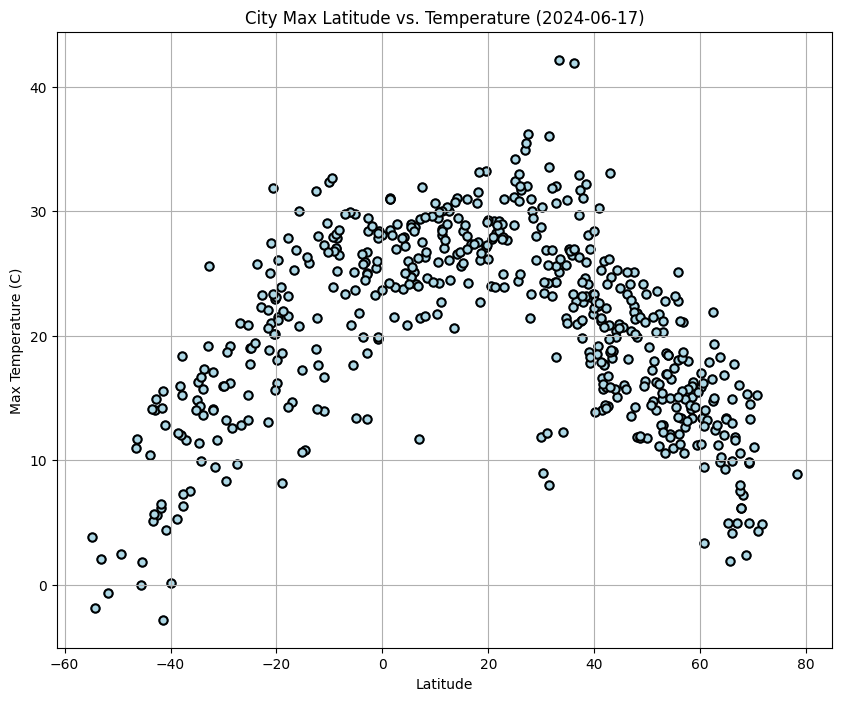

In [56]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.grid(True)

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

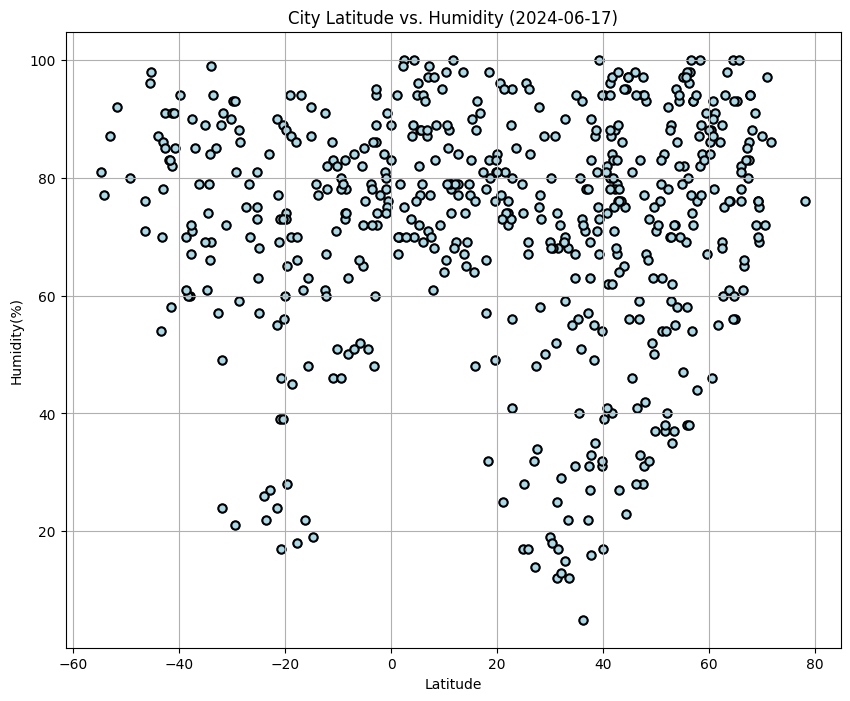

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

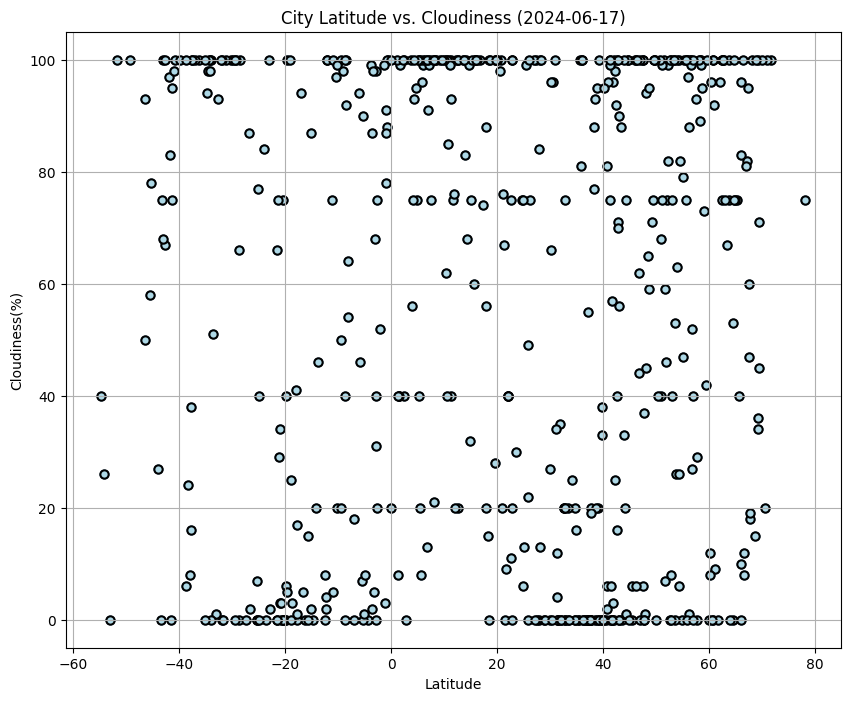

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

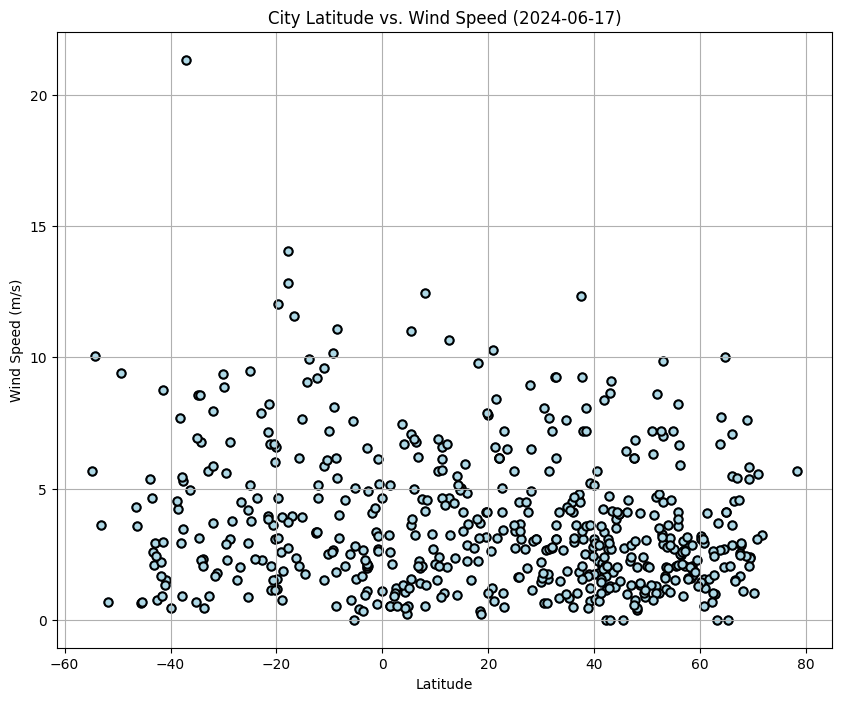

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='lightblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):

    # linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"

     # Plot the regression line
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")

    # Print the linear equation and R-squared value
    print(f"Linear equation: {line_eq}")
    print(f"The R²-value is: {rvalue**2}")

    #Scatter the data in plot
    plt.scatter(x, y)

    #Label x and y axis
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    
    # Display the plot
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,16.05,81,6,2.74,FR,1724205608
1,constantia,44.1833,28.6500,20.39,75,20,3.50,RO,1724205609
4,yanam,16.7333,82.2167,27.33,91,100,1.52,IN,1724205612
8,tiksi,71.6872,128.8694,4.88,86,100,3.24,RU,1724205616
9,berbera,10.4396,45.0143,29.43,66,62,5.66,SO,1724205617


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,callao,-12.0667,-77.1500,17.62,82,100,5.14,PE,1724205378
3,atafu village,-8.5421,-172.5159,27.84,78,100,11.07,TK,1724205611
5,grytviken,-54.2811,-36.5092,-1.85,77,26,10.04,GS,1724205613
6,margaret river,-33.9500,115.0667,13.64,69,100,2.31,AU,1724205614
7,puerto ayora,-0.7393,-90.3518,19.75,91,88,2.68,EC,1724205615


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y =-0.28x + 31.83
The R²-value is: 0.5339668798614133


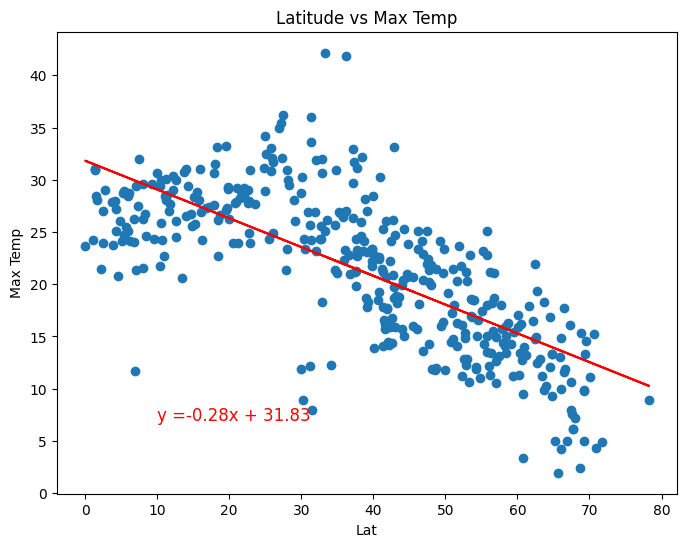

In [39]:
#Northern Hemisphere
# Usage of the northern hemisphere dataframes for data 
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 5)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Max Temp")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression function
linear_regress(x, y, eqn_coordinates)
# Display the plot
plt.show()


Linear equation: y = 0.44x + 28.03
The R²-value is: 0.6070812257237368


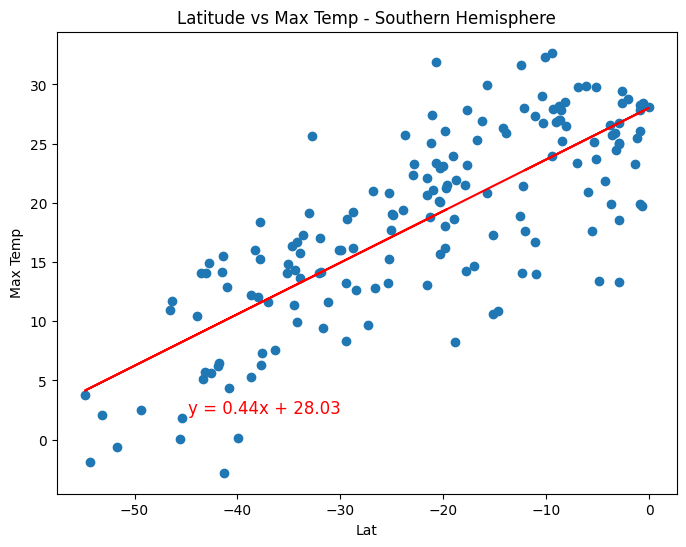

In [40]:
#Southern Hemisphere
# Usage of the southern hemisphere dataframes for data 
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 5)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Max Temp - Southern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


**Discussion about the linear relationship:
In the Northern hemisphere the slope of −0.28 indicates a negative relationship between latitude and maximum temperature. The intercept of 31.83 suggests that at a latitude of 0° a maximum temperature of around 31.83°C. The R²-value of approximately 0.534 suggests that about 53.4% of the variability in maximum temperature can be explained by latitude in the Northern Hemisphere.
In the Southern hemisphere slope of 0.44 indicates a positive relationship between latitude and maximum temperature.The intercept of 28.03 suggests that at 0° a slightly lower maximum temperature of around 28.03°C.The R²-value of approximately 0.607 indicates that about 60.7% of the variability in maximum temperature can be explained by latitude in the Southern Hemisphere. The R²-values suggest that latitude alone explains temperature variability slightly better in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y =-0.01x + 72.03
The R²-value is: 0.0001380060412232549


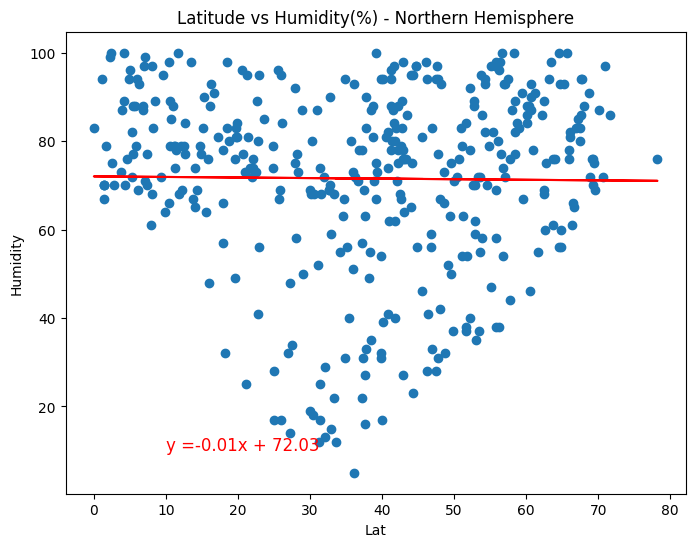

In [43]:
#Northern Hemisphere
# Usage of the dataframes for humidity in Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 5)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Humidity(%) - Northern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


Linear equation: y =-0.14x + 68.34
The R²-value is: 0.012082412403144723


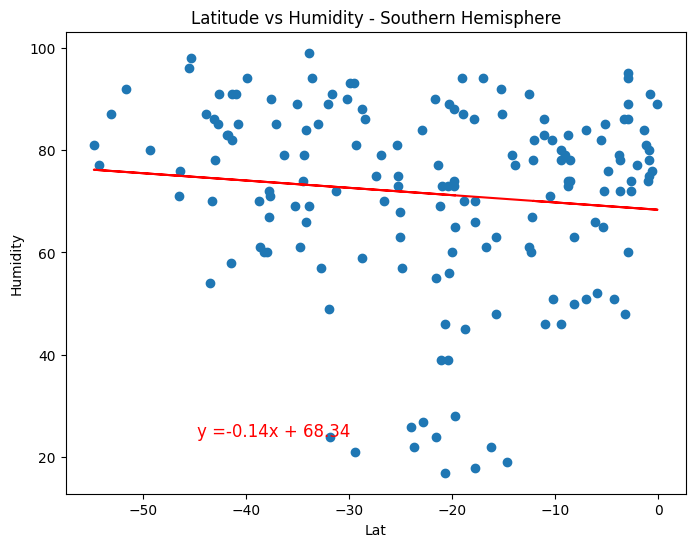

In [70]:
#Southern Hemisphere
# Usage of the dataframes for humidity in Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 7)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Humidity - Southern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


**Discussion about the linear relationship:In the Northern Hemisphere, the slope of −0.01 indicates a negative relationship between latitude and humidity. The intercept of 72.03 suggests that at a latitude of 0°, the humidity level would be around 72.03%. The R²-value of approximately 0.0001 suggests that only about 0.01% of the variability in humidity can be explained by latitude in the Northern Hemisphere.
In the Southern Hemisphere, the slope of −0.14 also indicates a negative relationship between latitude and humidity. The intercept of 68.34 suggests that at 0°, the humidity level would be around 68.34%. The R²-value of approximately 0.012 indicates that about 1.2% of the variability in humidity can be explained by latitude in the Southern Hemisphere. The R²-values suggest that latitude alone explains humidity variability slightly better in the Southern Hemisphere, but in both hemispheres, the relationship is extremely weak.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y =-0.20x + 63.67
The R²-value is: 0.00855578728250978


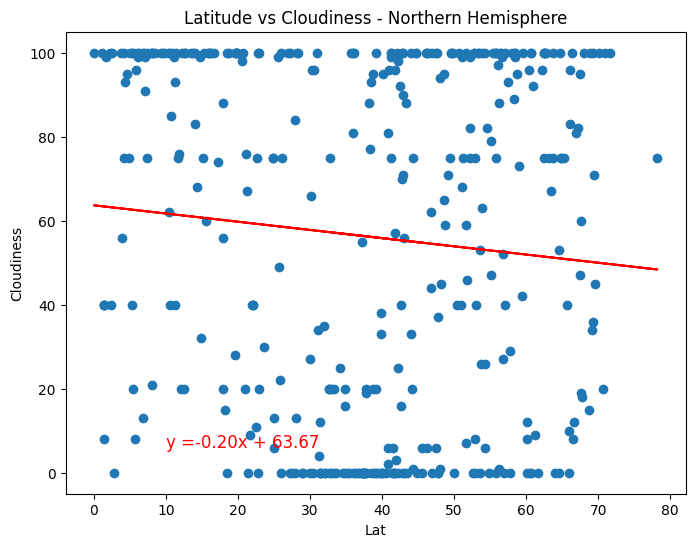

In [68]:
#Northern Hemisphere
# Usage of the dataframes for cloudiness in Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 6)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Cloudiness - Northern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()

Linear equation: y =-0.39x + 41.04
The R²-value is: 0.01778666361486711


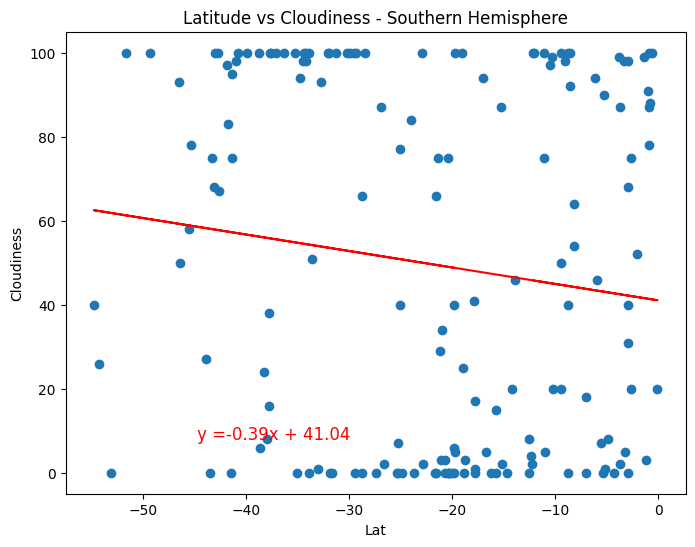

In [67]:
# Southern Hemisphere
# Usage of the dataframes for cloudiness in Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 8)

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Cloudiness - Southern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


**Discussion about the linear relationship:In the Northern Hemisphere, the slope of −0.20 indicates a negative relationship between latitude and cloudiness. The intercept of 63.67 suggests that at a latitude of 0°, the cloudiness level would be around 63.67%. The R²-value of approximately 0.0086 suggests that only about 0.86% of the variability in cloudiness can be explained by latitude in the Northern Hemisphere.

In the Southern Hemisphere, the slope of −0.39 also indicates a negative relationship between latitude and cloudiness. The intercept of 41.04 suggests that at 0°, the cloudiness level would be around 41.04%. The R²-value of approximately 0.0178 indicates that about 1.78% of the variability in cloudiness can be explained by latitude in the Southern Hemisphere. The R²-values suggest that latitude alone explains cloudiness variability slightly better in the Southern Hemisphere, but in both hemispheres, the relationship is very weak

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y =-0.01x + 3.82
The R²-value is: 0.009458055458414976


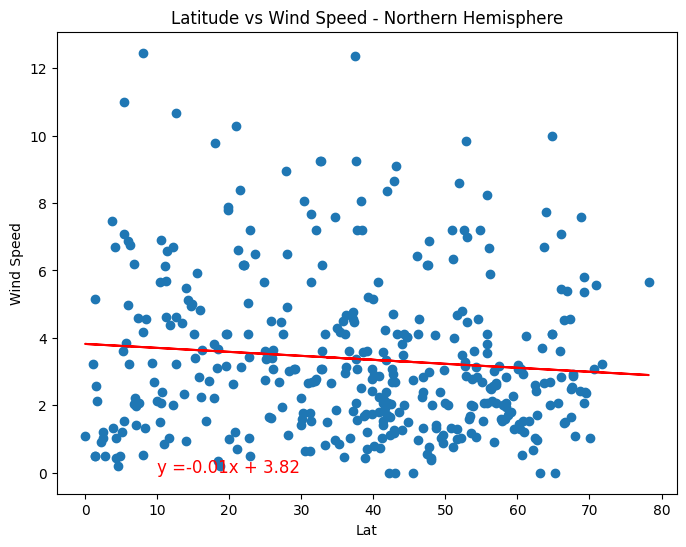

In [65]:
# Northern Hemisphere
# Usage of the dataframes for wind speed in Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min()) 

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Wind Speed - Northern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


Linear equation: y =-0.01x + 4.06
The R²-value is: 0.0016473381702957022


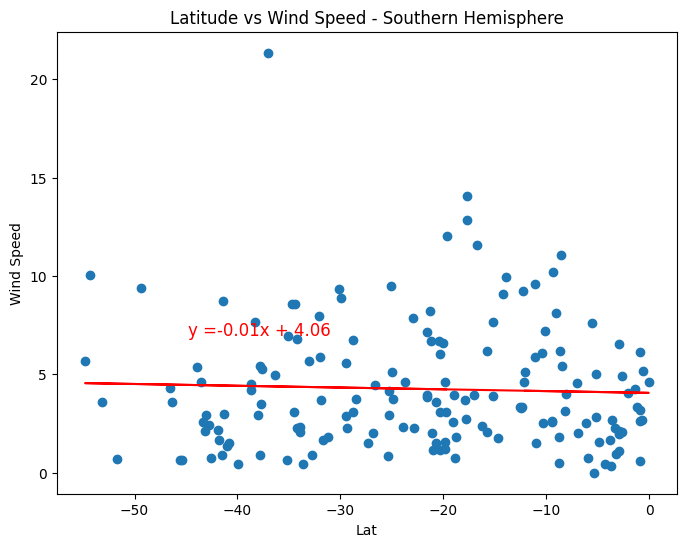

In [63]:
# Southern Hemisphere
# Usage of the dataframes for wind speed in Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Setting the coordinates for the equation 
eqn_coordinates = (x.min() + 10, y.min() + 7)  

# Display a larger figure
plt.figure(figsize=(8, 6))

# Title the plot
plt.title("Latitude vs Wind Speed - Southern Hemisphere")

# Label x and y axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Linear regression function
linear_regress(x, y, eqn_coordinates)

# Display the plot
plt.show()


**Discussion about the linear relationship:In the Northern Hemisphere, the slope of −0.01 indicates a very weak negative relationship between latitude and wind speed. The intercept of 3.82 suggests that at a latitude of 0°, the wind speed would be around 3.82 m/s. The R²-value of approximately 0.0095 suggests that only about 0.95% of the variability in wind speed can be explained by latitude in the Northern Hemisphere.

In the Southern Hemisphere, the slope of −0.01 similarly indicates a weak negative relationship between latitude and wind speed. The intercept of 4.06 suggests that at 0°, the wind speed would be around 4.06 m/s. The R²-value of approximately 0.0016 indicates that only about 0.16% of the variability in wind speed can be explained by latitude in the Southern Hemisphere. The R²-values suggest that latitude has an extremely weak influence on wind speed variability in both hemispheres, with virtually no significant relationship observed.